In [9619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
import warnings
warnings.filterwarnings('ignore')

In [9620]:
df = pd.read_csv('train.csv')

In [9621]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9622]:
df.shape

(1460, 81)

In [9623]:
#df.info()

In [9624]:
#df.describe()

# Distinguish Data

#### Numeric Data

In [9625]:
#Get all the columns with numeric data
cols = df.select_dtypes([np.number]).columns
print (cols)
cols = list(cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [9626]:
#It is numeric but contains categorical data
cols.remove('MSSubClass')

In [9627]:
cols.remove('Id')
cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Categorical Variable

In [9628]:
cat_variables = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                 'SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageFinish','GarageType',
                'FireplaceQu','Functional','KitchenQual','Electrical','CentralAir','HeatingQC','Heating','BsmtFinType2',
                'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Foundation','MasVnrType','RoofStyle','RoofMatl','Exterior1st',
                'Exterior2nd','BldgType','HouseStyle','ExterQual','ExterCond','Condition1','Condition2','PoolQC','MiscFeature','Fence']
len(cat_variables)

44

# Handle Null Values

In [9629]:
(df[cat_variables].isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageQual         81
GarageType         81
GarageFinish       81
GarageCond         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrType          8
Electrical          1
RoofStyle           0
Foundation          0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
RoofMatl            0
MSSubClass          0
Heating             0
MSZoning            0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
SaleType            0
SaleCondition       0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
HeatingQC           0
dtype: int64

### Impute Categorical Data with missing values

In [9630]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [9631]:
df['PoolQC'] = df['PoolQC'].apply(lambda x: 'NoQC' if pd.isna(x) else x)

In [9632]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [9633]:
df['MiscFeature'] = df['MiscFeature'].apply(lambda x: 'NoFeat' if pd.isna(x) else x)

In [9634]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9635]:
df['Alley'] = df['Alley'].apply(lambda x: 'NoAlley' if pd.isna(x) else x)

In [9636]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [9637]:
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: 'NoFP' if pd.isna(x) else x)

In [9638]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [9639]:
df['Fence'] = df['Fence'].apply(lambda x: 'NoFence' if pd.isna(x) else x)

In [9640]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [9641]:
df['GarageCond'] = df['GarageCond'].apply(lambda x: 'NoGarage' if pd.isna(x) else x)

In [9642]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [9643]:
df['GarageQual'] = df['GarageQual'].apply(lambda x: 'NoGarage' if pd.isna(x) else x)

In [9644]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [9645]:
df['GarageType'] = df['GarageType'].apply(lambda x: 'NoGarage' if pd.isna(x) else x)

In [9646]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [9647]:
df['GarageFinish'] = df['GarageFinish'].apply(lambda x: 'NoGarage' if pd.isna(x) else x)

In [9648]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [9649]:
df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x: 'NoBsmt' if pd.isna(x) else x)

In [9650]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [9651]:
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: 'NoBsmt' if pd.isna(x) else x)

In [9652]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [9653]:
df['BsmtQual'] = df['BsmtQual'].apply(lambda x: 'NoBsmt' if pd.isna(x) else x)

In [9654]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [9655]:
df['BsmtCond'] = df['BsmtCond'].apply(lambda x: 'NoBsmt' if pd.isna(x) else x)

In [9656]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [9657]:
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x: 'NoBsmt' if pd.isna(x) else x)

In [9658]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [9659]:
df['MasVnrType'] = df['MasVnrType'].apply(lambda x: 'None' if pd.isna(x) else x)

In [9660]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [9661]:
df['Electrical'] = df['Electrical'].apply(lambda x: 'SBrkr' if pd.isna(x) else x)

#### No null values in the data now

In [9662]:
(df[cat_variables].isnull().sum())

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
SaleCondition    0
SaleType         0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
FireplaceQu      0
Functional       0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Foundation       0
MasVnrType       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
BldgType         0
HouseStyle       0
ExterQual        0
ExterCond        0
Condition1       0
Condition2       0
PoolQC           0
MiscFeature      0
Fence            0
dtype: int64

### However there are null values in the numeric variables

In [9663]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

<AxesSubplot:xlabel='LotFrontage'>

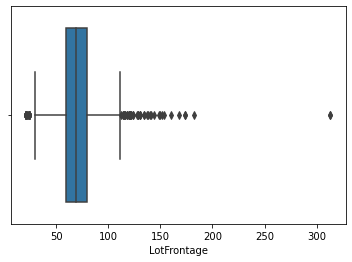

In [9664]:
#LotFrontage: Linear feet of street connected to property
sns.boxplot(df.LotFrontage)

In [9665]:
df[['LotFrontage']].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


In [9666]:
df['LotFrontage'] = df['LotFrontage'].apply(lambda x: df['LotFrontage'].mean() if pd.isna(x) else x)

In [9667]:
df['LotFrontage'].value_counts()

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
112.000000      1
138.000000      1
149.000000      1
38.000000       1
111.000000      1
Name: LotFrontage, Length: 111, dtype: int64

In [9668]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea'>

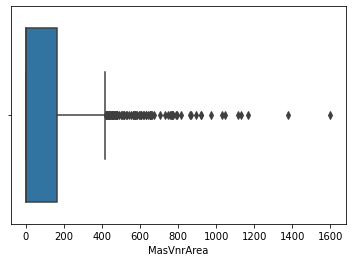

In [9669]:
sns.boxplot(df.MasVnrArea)

In [9670]:
df['MasVnrArea'] = df['MasVnrArea'].apply(lambda x: df['MasVnrArea'].mean() if pd.isna(x) else x)

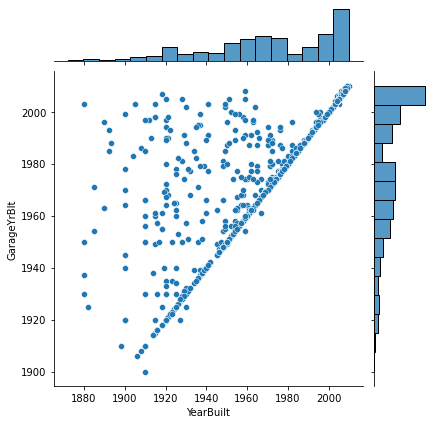

In [9671]:
#GarageYrBlt
#YearBuilt
#df[['GarageYrBlt','YearBuilt']]
sns.jointplot(x=df['YearBuilt'],y=df['GarageYrBlt'])

#### We can impute year that Garage was built with year the house was built

In [9672]:
df.GarageYrBlt = df.GarageYrBlt.combine_first(df.YearBuilt)

#### All null values handled

In [9673]:
df.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

# Univariate Analysis of Numerical Variables

In [9674]:
df['EnclosedPorch'].describe()

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

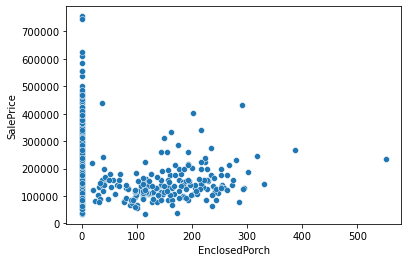

In [9675]:
sns.scatterplot(x='EnclosedPorch',y='SalePrice',data=df)

In [9676]:
df['BsmtHalfBath'].describe()

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

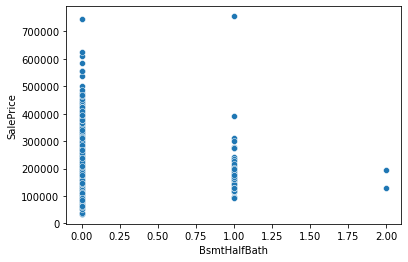

In [9677]:
sns.scatterplot(x='BsmtHalfBath',y='SalePrice',data=df)

In [9678]:
cols.remove('BsmtHalfBath')

In [9679]:
df['BsmtFinSF2'].describe()

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

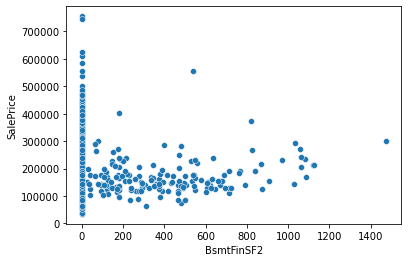

In [9680]:
sns.scatterplot(x='BsmtFinSF2',y='SalePrice',data=df)

In [9681]:
cols.remove('BsmtFinSF2')

In [9682]:
df['3SsnPorch'].describe()

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

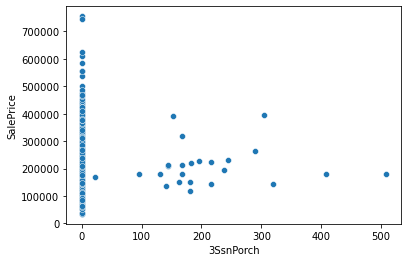

In [9683]:
sns.scatterplot(x='3SsnPorch',y='SalePrice',data=df)

In [9684]:
df[['3SsnPorch','SalePrice']].corr()

,3SsnPorch,SalePrice
3SsnPorch,1.000000,0.044584
SalePrice,0.044584,1.000000


In [9685]:
cols.remove('3SsnPorch')

In [9686]:
df['LowQualFinSF'].describe()

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

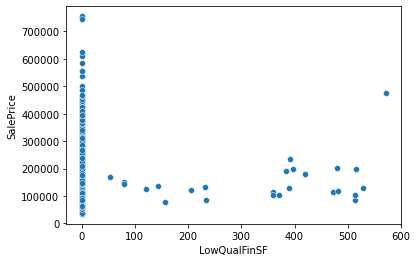

In [9687]:
sns.scatterplot(x='LowQualFinSF',y='SalePrice',data=df)

In [9688]:
df[['LowQualFinSF','SalePrice']].corr()

,LowQualFinSF,SalePrice
LowQualFinSF,1.000000,-0.025606
SalePrice,-0.025606,1.000000


In [9689]:
cols.remove('LowQualFinSF')

In [9690]:
df['ScreenPorch'].describe()

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

<AxesSubplot:xlabel='ScreenPorch'>

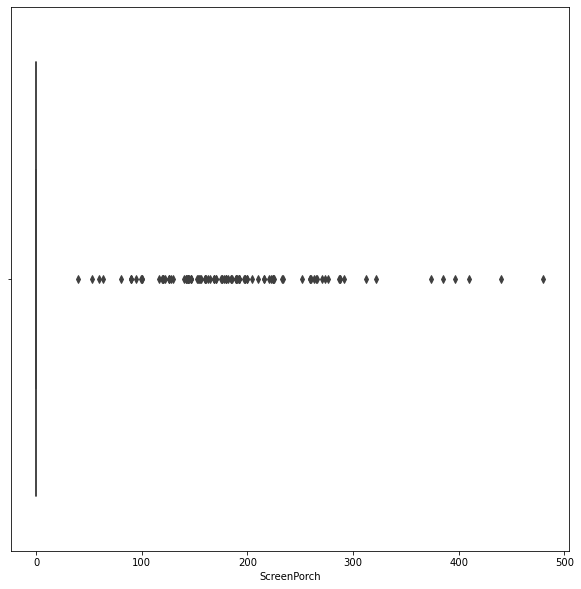

In [9691]:
plt.figure(figsize=(10,10))
sns.boxplot('ScreenPorch',data=df)

In [9692]:
df[['ScreenPorch','SalePrice']].corr()

,ScreenPorch,SalePrice
ScreenPorch,1.000000,0.111447
SalePrice,0.111447,1.000000


In [9693]:
cols.remove('ScreenPorch')

In [9694]:
df['MiscVal'].describe()

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [9695]:
df[['MiscVal','SalePrice']].corr()

,MiscVal,SalePrice
MiscVal,1.00000,-0.02119
SalePrice,-0.02119,1.00000


In [9696]:
cols.remove('MiscVal')

In [9697]:
df['KitchenAbvGr'].describe()

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

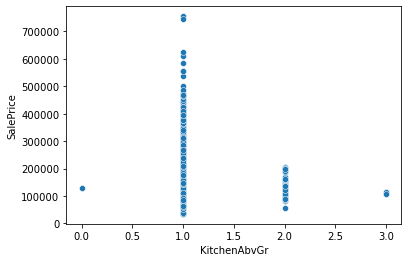

In [9698]:
sns.scatterplot(x='KitchenAbvGr',y='SalePrice',data=df)

In [9699]:
df[['KitchenAbvGr','SalePrice']].corr()

,KitchenAbvGr,SalePrice
KitchenAbvGr,1.000000,-0.135907
SalePrice,-0.135907,1.000000


In [9700]:
plt.figure(figsize=(150, 150))
for i in range (0,len(cols)-1):
    plt.subplot(18,2,i+1)
    sns.boxplot(cols[i], data = df)
plt.show()

#### Remove Outliers

In [9701]:
upperWhiskerFrontage = np.quantile(df['LotFrontage'], 0.95)
df['LotFrontage'] = df['LotFrontage'].apply(lambda x: upperWhiskerFrontage if (x > upperWhiskerFrontage) else x)

upperWhiskerBsmt = np.quantile(df['TotalBsmtSF'], 0.95)
df['TotalBsmtSF'] = df['TotalBsmtSF'].apply(lambda x: upperWhiskerBsmt if (x > upperWhiskerBsmt) else x)

upperWhiskerGrLivArea = np.quantile(df['GrLivArea'], 0.95)
df['GrLivArea'] = df['GrLivArea'].apply(lambda x: upperWhiskerGrLivArea if (x > upperWhiskerGrLivArea) else x)

### Bivariate Analysis of Categorical Variables

<AxesSubplot:>

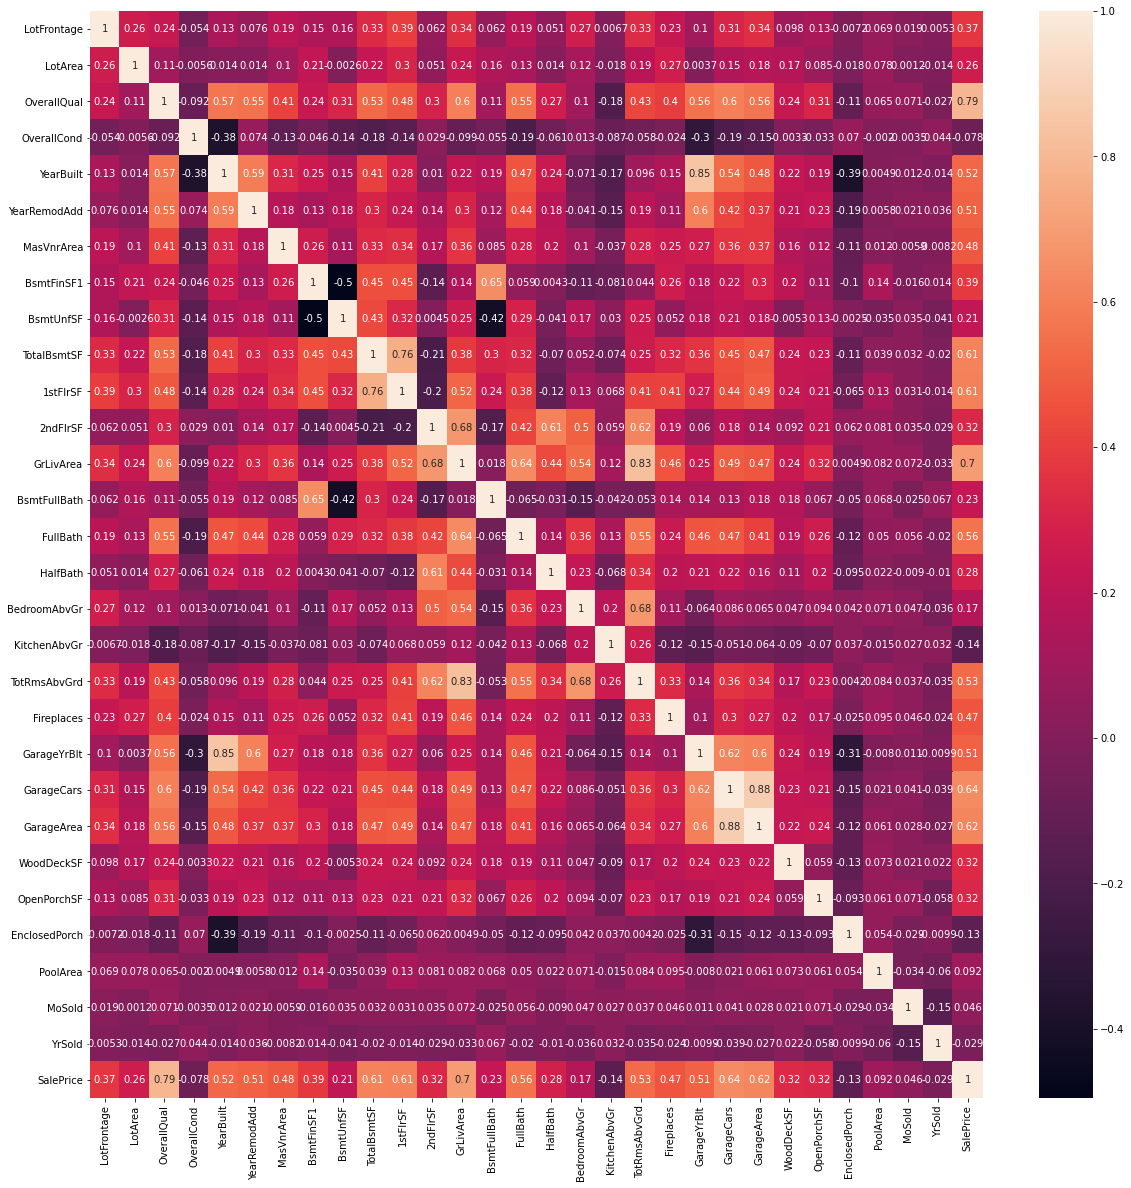

In [9702]:
plt.figure(figsize=(20,20))
sns.heatmap(df[cols].corr(),annot=True)

#### Drop Features that are collinear

In [9703]:
df = df.drop('1stFlrSF',axis=1)
df = df.drop('2ndFlrSF',axis=1)
df = df.drop('TotRmsAbvGrd',axis=1)
df = df.drop('GarageCars',axis=1)
df = df.drop('GarageYrBlt',axis=1)
df = df.drop('YrSold',axis=1)

In [9704]:
#sns.pairplot(df[cols])

In [9705]:
cols.remove('GarageYrBlt')
cols.remove('GarageCars')
cols.remove('YrSold')
cols.remove('1stFlrSF')
cols.remove('2ndFlrSF')
cols.remove('TotRmsAbvGrd')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

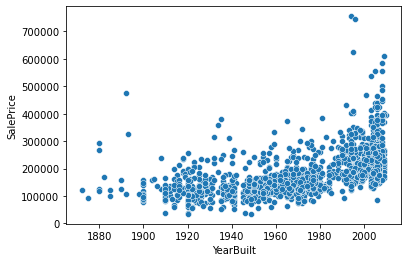

In [9706]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=df)

#### Handle Categorical Variables

In [9707]:
for x in range(0,len(cat_variables)):
    var_name = cat_variables[x]+'_dummy'
    dummy_cols = pd.get_dummies(df[cat_variables[x]], prefix=cat_variables[x],drop_first = True)
    df = pd.concat([df, dummy_cols], axis = 1)
    df = df.drop(cat_variables[x], axis=1)

In [9708]:
df.shape

(1460, 268)

In [9709]:
#cols.remove('SalePrice')

In [9710]:
def func(x):
    if x not in cols:
        return x
#y = filter(func, (1,2,3,4))  

non_numeric = list(filter(func,list(df.columns)))

In [9711]:
#df = df.drop('GrLivArea',axis=1)
#df = df.drop('OverallQual',axis=1)
#df = df.drop('RoofMatl_WdShngl',axis=1)
#df = df.drop('TotalBsmtSF',axis=1)
#df = df.drop('Neighborhood_NoRidge',axis=1)

#cols.remove('GrLivArea')
#cols.remove('OverallQual')
#cols.remove('TotalBsmtSF')

In [9712]:
df = df.reset_index()

In [9713]:
df_train, df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [9714]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols] = scaler.transform(df_test[cols])

In [9715]:
y_train = df_train.pop('SalePrice')
x_train = df_train
y_test = df_test.pop('SalePrice')
x_test = df_test

#  Model Trials

In [9716]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    RSS = ((y-y_pred)**2).sum()
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE  {name} {MAE}")
        print(F"RSS  {name} {RSS}")
        print(F"R2 Score {name} {R2} \n")
    return R2,RSS,MSE,MAE

## Linear Regression Model

In [9717]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [9718]:
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

In [9719]:
r2_train_lr = r2_score(y_pred_train,y_train)
r2_test_lr = r2_score(y_pred_test,y_test)
rss_train_lr = np.sum(np.square(y_train - y_pred_train))
rss_test_lr = np.sum(np.square(y_test - y_pred_test))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
rmse_train_lr = mse_train_lr**0.5 
rmse_test_lr = mse_test_lr**0.5 

In [9720]:
### Difference of R2_Score Between Train and Test is very high

# RFE

In [9721]:
## Error Statistics
Error_Statistic = {}

In [9722]:
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [9723]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('index', False, 214),
 ('Id', False, 215),
 ('LotFrontage', False, 73),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 19),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 206),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 70),
 ('LowQualFinSF', False, 207),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 154),
 ('FullBath', False, 31),
 ('HalfBath', False, 139),
 ('BedroomAbvGr', False, 18),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 63),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 71),
 ('OpenPorchSF', False, 58),
 ('EnclosedPorch', False, 151),
 ('3SsnPorch', False, 211),
 ('ScreenPorch', False, 212),
 ('PoolArea', True, 1),
 ('MiscVal', False, 213),
 ('MoSold', False, 141),
 ('MSSubClass_30', False, 118),
 ('MSSubClass_40', False, 164),
 ('MSSubClass_45', False, 146),
 ('MSSubClass_50', False, 119),
 ('MSSubClass_60', False, 126

In [9724]:
suported_col = x_train.columns[rfe.support_]
suported_col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'GarageArea', 'PoolArea', 'MSSubClass_90', 'MSSubClass_190',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'SaleCondition_Partial', 'SaleType_Con', 'SaleType_New',
       'GarageCond_Gd', 'GarageCond_Po', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageFinish_NoGarage', 'Functional_Sev', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Heating_OthW', 'Heating_Wall', 'BsmtFinType1_NoBsmt',
       'BsmtExposure_Gd', 'BsmtCond_NoBsmt', 'BsmtQual_NoBsmt',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'BldgType_2fmCon', 'BldgType_Duplex', 'Condition1_RRAe',
       'Condition2_PosN', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_NoQC'],
      dtyp

In [9725]:
x_train_rfe = x_train[suported_col]
x_train_rfe_sm = sm.add_constant(x_train_rfe)

In [9726]:
lm = sm.OLS(y_train,x_train_rfe_sm).fit()   # Running the linear model

In [9727]:
#print(lm.summary())

In [9728]:
y_train_pred = lm.predict(x_train_rfe_sm)

Text(0.5, 0, 'Errors')

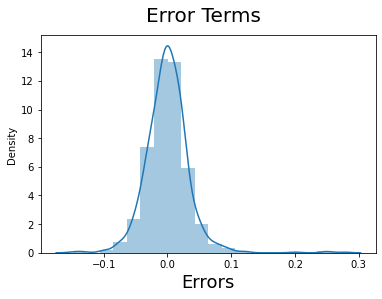

In [9729]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [9730]:
#df_test[cols] = scaler.transform(df_test[cols])
#y_test = df_test.pop('SalePrice')
x_test_rfe = df_test[suported_col]
x_test_sm = sm.add_constant(x_test_rfe)

In [9731]:
y_test_pred = lm.predict(x_test_sm)

Text(0, 0.5, 'y_pred')

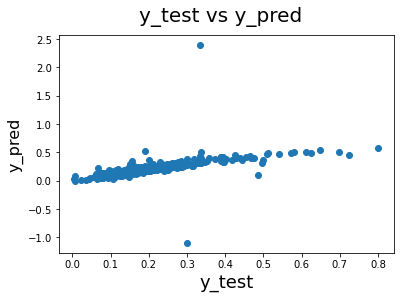

In [9732]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [9733]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.697682
GarageArea          0.623431
TotalBsmtSF         0.610873
                      ...   
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
FireplaceQu_NoFP   -0.471908
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 269, dtype: float64

In [9734]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)
rmse_train_lr = mse_train_lr**0.5 
rmse_test_lr = mse_test_lr**0.5 
print(rmse_train_lr)
print(rmse_test_lr)

0.025554581809312495
0.1078667305372803


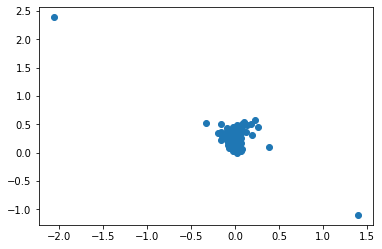

In [9735]:
plt.scatter((y_test-y_test_pred),y_test_pred)

In [9736]:
Error_Statistic['RFE_train'] = get_error_stats(y_train,y_pred_train)

MSE Test 0.000653036651448845
MAE  Test 0.016991668165579735
RSS  Test 0.6667504211292707
R2 Score Test 0.9458148005560306 



In [9737]:
Error_Statistic['RFE_test'] = get_error_stats(y_test,y_pred_test)

MSE Test 0.011635231556802237
MAE  Test 0.03282508831517983
RSS  Test 5.09623142187938
R2 Score Test 0.06247258316161097 



In [9738]:
rfe_error = pd.DataFrame([Error_Statistic['RFE_train'][0],Error_Statistic['RFE_test'][0],
                          Error_Statistic['RFE_train'][1],Error_Statistic['RFE_test'][1],
                          Error_Statistic['RFE_train'][2],Error_Statistic['RFE_test'][2]],columns=['RFE'])

### Residual are not spread and difference in rmse is also very high

In [9739]:
#Plotting all residuals and predictors
#for i in range(0,len(cols)-1):
#    plt.scatter(x_test[suported_col[i]],(y_test-y_test_pred))
#    plt.xlabel(suported_col[i])
#    plt.show()

In [9740]:
#Plotting predicted and real values
#for i in range(0,len(suported_col)-1):
#    plt.scatter(x_test[suported_col[i]],y_test)
#    plt.scatter(x_test[suported_col[i]],y_test_pred)
#    plt.xlabel(suported_col[i])
#    plt.show()

## End RFE

# Lasso and Ridge Method

In [9741]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [9742]:
from sklearn.linear_model import Lasso,Ridge
lasso1 = Lasso()
lasso1.fit(x_train, y_train)

ridge1 = Ridge()
ridge1.fit(x_train, y_train)

Ridge()

# Lasso

In [9743]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(x_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(x_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

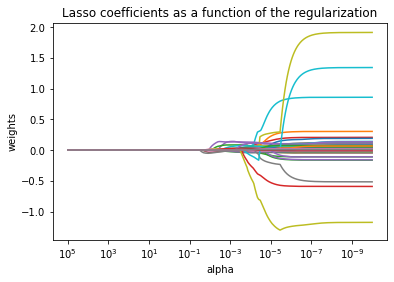

In [9744]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [9745]:
# list of alphas to tune
n_alphas
params = {'alpha': np.logspace(-2, -7, 100)}

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(x_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 8.90215085e-03, 7.92482898e-03, 7.05480231e-03,
       6.28029144e-03, 5.59081018e-03, 4.97702356e-03, 4.43062146e-03,
       3.94420606e-03, 3.51119173e-03, 3.12571585e-03, 2.78255940e-03,
       2.47707636e-03, 2.20513074e-03, 1.96304065e-03, 1.74752840e-03,
       1.55567614e-03, 1.38488637e-03, 1.23284674e-03, 1....
       9.11162756e-07, 8.11130831e-07, 7.22080902e-07, 6.42807312e-07,
       5.72236766e-07, 5.09413801e-07, 4.53487851e-07, 4.03701726e-07,
       3.59381366e-07, 3.19926714e-07, 2.84803587e-07, 2.53536449e-07,
       2.25701972e-07, 2.00923300e-07, 1.78864953e-07, 1.59228279e-07,
       1.41747416e-07, 1.26185688e-07, 1.12332403e-07, 1.00000000e-07])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

# Best Alpha value from Lasso

In [9746]:
model_cv_lasso.best_params_

{'alpha': 0.00019179102616724886}

In [9747]:
cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
#cv_results.head()

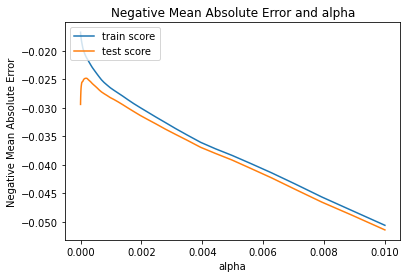

In [9748]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [9749]:
## Model Built from Best Alpha from Lasso

In [9750]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train) 

Lasso(alpha=0.0001)

In [9751]:
y_pred_test = lasso.predict(x_test)
residual = y_test - y_pred

In [9752]:
y_pred_train = lasso.predict(x_train)

In [9753]:
Error_Statistic['Lasso_train'] = get_error_stats(y_train,y_pred_train)
Error_Statistic['Lasso_test'] = get_error_stats(y_test,y_pred_test)

MSE Test 0.001001309700916352
MAE  Test 0.02044827404197258
RSS  Test 1.0223372046355954
R2 Score Test 0.9169171198447137 

MSE Test 0.0024868330764026697
MAE  Test 0.026715840561263568
RSS  Test 1.0892328874643693
R2 Score Test 0.799619442136068 



In [9754]:
rfe_error['Lasso'] = [Error_Statistic['Lasso_train'][0],Error_Statistic['Lasso_test'][0],
                      Error_Statistic['Lasso_train'][1],Error_Statistic['Lasso_test'][1],
                      Error_Statistic['Lasso_train'][2],Error_Statistic['Lasso_test'][2]]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

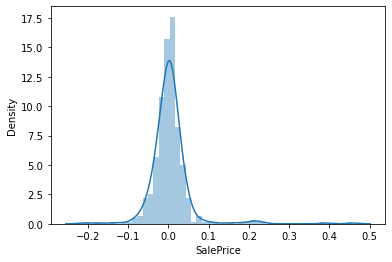

In [9755]:
sns.distplot(residual)

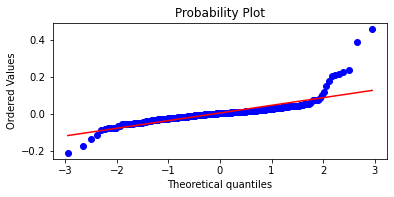

In [9756]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

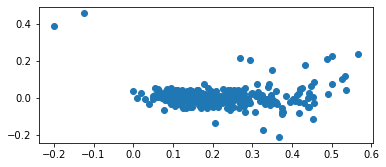

In [9757]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

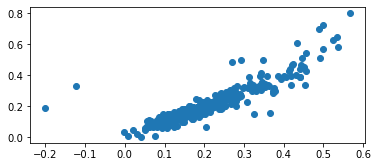

In [9758]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

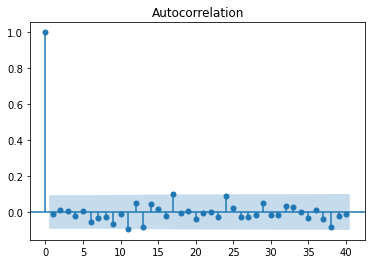

In [9759]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

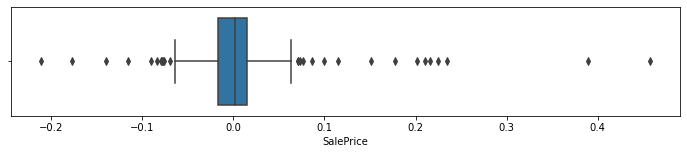

In [9760]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

In [9761]:
coefficients = lasso.coef_
data = {'column_name':x_train.columns,'co_efficient':coefficients}
beta_coefficients = pd.DataFrame(data)
beta_coefficients.sort_values(by='co_efficient',ascending=False)[:10]

,column_name,co_efficient
14,GrLivArea,0.128340
4,OverallQual,0.111399
194,RoofMatl_WdShngl,0.110064
12,TotalBsmtSF,0.067872
79,Neighborhood_NoRidge,0.066517
9,BsmtFinSF1,0.062014
8,MasVnrArea,0.056614
5,OverallCond,0.055645
3,LotArea,0.052909
22,GarageArea,0.044296


# Ridge

In [9762]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(x_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = ridge.predict(x_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

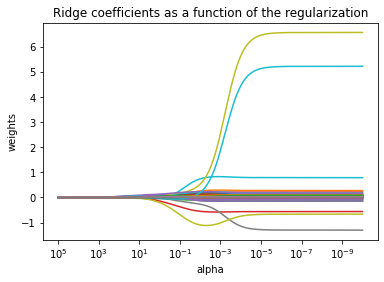

In [9763]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [9764]:
# list of alphas to tune
n_alphas
params = {'alpha': np.logspace(1, -5, 100)}

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(alpha=100000.0),
             param_grid={'alpha': array([1.00000000e+01, 8.69749003e+00, 7.56463328e+00, 6.57933225e+00,
       5.72236766e+00, 4.97702356e+00, 4.32876128e+00, 3.76493581e+00,
       3.27454916e+00, 2.84803587e+00, 2.47707636e+00, 2.15443469e+00,
       1.87381742e+00, 1.62975083e+00, 1.41747416e+00, 1.23284674e+00,
       1.07226722e+00, 9.32603347e-01, 8.1...
       1.41747416e-04, 1.23284674e-04, 1.07226722e-04, 9.32603347e-05,
       8.11130831e-05, 7.05480231e-05, 6.13590727e-05, 5.33669923e-05,
       4.64158883e-05, 4.03701726e-05, 3.51119173e-05, 3.05385551e-05,
       2.65608778e-05, 2.31012970e-05, 2.00923300e-05, 1.74752840e-05,
       1.51991108e-05, 1.32194115e-05, 1.14975700e-05, 1.00000000e-05])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [9765]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results.head()

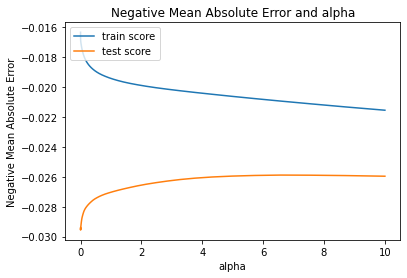

In [9766]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Best alpha value from Ridge

In [9767]:
model_cv.best_params_

{'alpha': 6.579332246575679}

In [9768]:
alpha = 6.579332246575679
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train) 

Ridge(alpha=6.579332246575679)

In [9769]:
y_pred_test = ridge.predict(x_test)

In [9770]:
y_pred_train = ridge.predict(x_train)

In [9771]:
Error_Statistic['Ridge_train'] = get_error_stats(y_train,y_pred_train)
Error_Statistic['Ridge_test'] = get_error_stats(y_test,y_pred_test)
rfe_error['Ridge'] = [Error_Statistic['Ridge_train'][0],Error_Statistic['Ridge_test'][0],
                      Error_Statistic['Ridge_train'][1],Error_Statistic['Ridge_test'][1],
                      Error_Statistic['Ridge_train'][2],Error_Statistic['Ridge_test'][2]]

MSE Test 0.0012571454632901936
MAE  Test 0.020959459746655067
RSS  Test 1.2835455180192876
R2 Score Test 0.8956893498897337 

MSE Test 0.00174812041082285
MAE  Test 0.025860724160937085
RSS  Test 0.7656767399404083
R2 Score Test 0.8591423982341749 



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

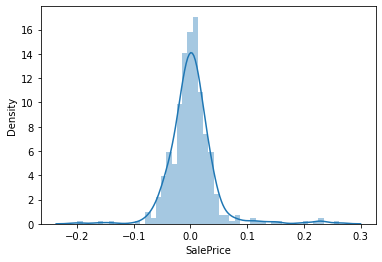

In [9772]:
residual = y_test - y_pred_test
sns.distplot(residual)

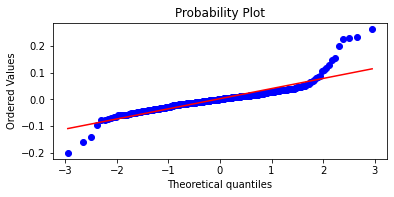

In [9773]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

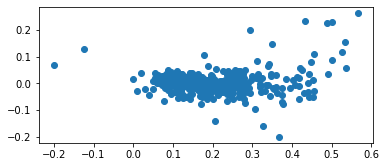

In [9774]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

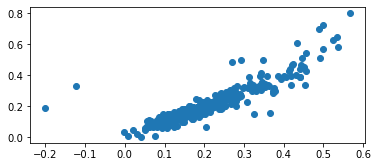

In [9775]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)

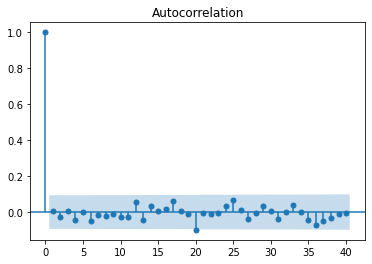

In [9776]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

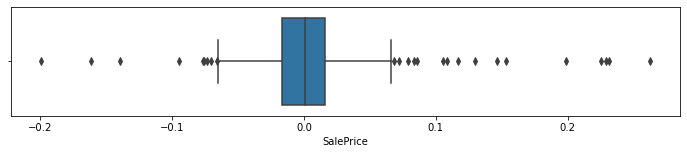

In [9777]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

In [9778]:
coefficients = ridge.coef_
data = {'column_name':x_train.columns,'co_efficient':coefficients}
beta_coefficients = pd.DataFrame(data)

## Top 10 variables that have significant contribution towards predicting the price of the house

In [9779]:
beta_coefficients.sort_values(by='co_efficient',ascending=False)[:10]

,column_name,co_efficient
14,GrLivArea,0.099250
4,OverallQual,0.071024
12,TotalBsmtSF,0.066556
79,Neighborhood_NoRidge,0.063634
194,RoofMatl_WdShngl,0.052464
17,FullBath,0.043571
22,GarageArea,0.036766
8,MasVnrArea,0.034293
5,OverallCond,0.032581
80,Neighborhood_NridgHt,0.026824


## The r2_score and RMSE values given below shows how well the predictors describe the price

In [9780]:
rfe_error['Metric'] = (['R2 Score Train','R2 Score Test','RSS Train','RSS Test','MSE Train','MSE Test'])
rfe_error.set_index('Metric',inplace=True)
rfe_error

,RFE,Lasso,Ridge
Metric,,,
R2 Score Train,0.945815,0.916917,0.895689
R2 Score Test,0.062473,0.799619,0.859142
RSS Train,0.666750,1.022337,1.283546
RSS Test,5.096231,1.089233,0.765677
MSE Train,0.000653,0.001001,0.001257
MSE Test,0.011635,0.002487,0.001748


## Best value of alpha from Lasso

In [9781]:
model_cv_lasso.best_params_

{'alpha': 0.00019179102616724886}

## Best Value of alpha from Ridge

In [9782]:
model_cv.best_params_

{'alpha': 6.579332246575679}